In [743]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ex1data2.txt')
df.columns=['size_of_house','number_of_bedrooms','price_of_house']

In [744]:
y = df.iloc[:,-1]
x = df.iloc[:,:2]

In [745]:
mean_vals = x.mean()
std_vals = x.std()
X = (x - mean_vals)/std_vals 

In [746]:
X.insert(0, '', 1)
X = X.to_numpy()
y = y.to_numpy()
m = len(y)
x_transpose = np.transpose(X)

In [747]:
def cost_function(parameters, X, y):
    predictions = np.dot(X, parameters)
    cost = (1/2 * m) * np.sum(np.square(predictions - y))
    return cost

[339119.45042281 111407.58936744  -6235.43747622]


Text(0, 0.5, 'Cost J')

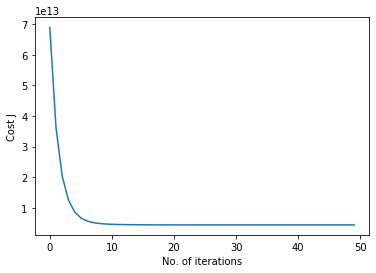

In [748]:
def multivariate_gradient_descent(no_of_iterations, learning_rate):
    theta = [1, 1, 1]
    J=[]
    for i in range(no_of_iterations):
        h = np.dot(X, theta) #Prediction = Data Matrix * Parameters
        theta = theta - learning_rate * (1/m) * (np.dot((h - y), X))
        J.append(cost_function(theta, X, y))
    return J, theta

no_of_iterations = 50
learning_rate = 0.3
J, theta_vectorized = multivariate_gradient_descent(no_of_iterations, learning_rate)
print(theta_vectorized)
plt.plot(J)
plt.xlabel('No. of iterations')
plt.ylabel('Cost J')

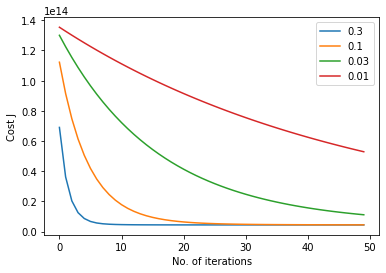

In [749]:
no_of_iterations = 50
J1, T1 = multivariate_gradient_descent(no_of_iterations, 0.3)
J2, T2 = multivariate_gradient_descent(no_of_iterations, 0.1)
J3, T3 = multivariate_gradient_descent(no_of_iterations, 0.03)
J4, T4 = multivariate_gradient_descent(no_of_iterations, 0.01)


plt.plot( J1, label='0.3')
plt.plot( J2, label='0.1')
plt.plot( J3, label='0.03')
plt.plot( J4, label='0.01')

plt.xlabel('No. of iterations')
plt.ylabel('Cost J')
plt.legend()

In [750]:
theta_normal_eq = np.dot(np.dot(np.linalg.pinv(np.dot(x_transpose, X)), x_transpose), y)
print(theta_normal_eq)

[339119.45652174 111467.1787705   -6295.02687927]


In [751]:
X = [1, (1650 - mean_vals.size_of_house)/std_vals.size_of_house, (3 - mean_vals.number_of_bedrooms)/std_vals.number_of_bedrooms]

Y1 = np.dot(X, theta_vectorized)
Y2 = np.dot(X, theta_normal_eq)

print(Y1)
print(Y2)

292208.1638710778
292195.8009513173
